# 1. Read the dataset to the python environment.

In [17]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,accuracy_score

In [18]:
df=pd.read_excel('iris.xls')

In [19]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df.shape

(150, 5)

In [22]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Label Encoding

In [23]:
df['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

In [25]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [27]:
df['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

# Insight
    The classification column which is the target variable is label encoded

# Checking for missing values

In [28]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2234e66f4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2234e66fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2234e66f160>,
 'medians': [<matplotlib.lines.Line2D at 0x2234ed12280>,
 'fliers': [<matplotlib.lines.Line2D at 0x2234ed125e0>,
 'means': []}

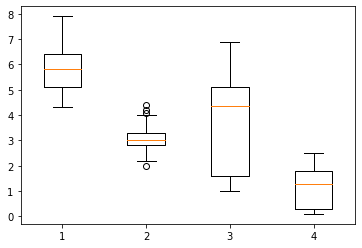

In [29]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])

{'whiskers': [<matplotlib.lines.Line2D at 0x2234ee175b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2234ee17c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2234ee17250>],
 'medians': [<matplotlib.lines.Line2D at 0x2234ee21370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2234ee216d0>],
 'means': []}

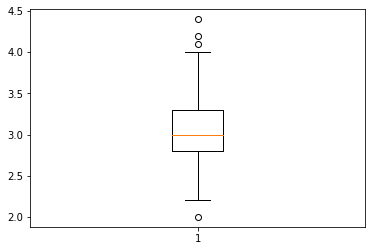

In [30]:
plt.boxplot(df['SW'])

In [31]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.8
3.0
3.3
2.05
4.05


In [32]:
outlier=[]
for x in df['SW']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [33]:
ind=df['SW']<low_lim
df.loc[ind].index

Int64Index([60], dtype='int64')

In [34]:
ind1=df['SW']>up_lim
df.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [35]:
df.drop([15, 32, 33, 60],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2234ee81160>,
 'caps': [<matplotlib.lines.Line2D at 0x2234ee81820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2234ee71e20>,
 'medians': [<matplotlib.lines.Line2D at 0x2234ee81ee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2234ee8a280>,
 'means': []}

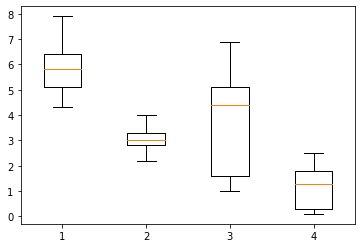

In [36]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])

# Insight
    All outliers are removed.

# Splitting the data

In [37]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [38]:
x=df.drop(['Classification'],axis=1)
y=df['Classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
x_train.shape

(116, 4)

In [40]:
x_test.shape

(30, 4)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# 1. Building the model using RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [30]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='weighted'))
print("Recall is:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9466666666666667
Recall is: 0.9333333333333333
F1 Score is: 0.9333333333333333


In [31]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]], dtype=int64)

In [32]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW      23.378171
PL      20.266696
mean    17.002889
kurt    14.403514
sum     13.124506
SL       7.980694
SW       2.168715
skew     1.674815
dtype: float64

# 2. Building the model using Gradient Boosting

# 2.1 Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict=gb.predict(x_test)

In [34]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average='weighted'))
print("Recall is:",recall_score(y_test,y_predict,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predict,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9466666666666667
Recall is: 0.9333333333333333
F1 Score is: 0.9333333333333333


In [35]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]], dtype=int64)

# 2.2 Extreme Gradient Boosting

In [36]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_predd=xgb.predict(x_test)

C:\Users\NJ\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
print("Accuracy is:",accuracy_score(y_test,y_predd))
print("Precision is:",precision_score(y_test,y_predd,average='weighted'))
print("Recall is:",recall_score(y_test,y_predd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predd,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9466666666666667
Recall is: 0.9333333333333333
F1 Score is: 0.9333333333333333


In [38]:
confusion_matrix(y_test,y_predd)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]], dtype=int64)

# 3. Building the model using Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_preddd=log_r.predict(x_test)

In [40]:
print("Accuracy is:",accuracy_score(y_test,y_preddd))
print("Precision is:",precision_score(y_test,y_preddd,average='weighted'))
print("Recall is:",recall_score(y_test,y_preddd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_preddd,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [41]:
confusion_matrix(y_test,y_preddd)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

# 4. Building the model using KNN Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predic=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predic)
    acc_values.append(acc)


In [43]:
acc_values

[0.9,
 0.9,
 0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333]

Text(0, 0.5, 'accuracy')

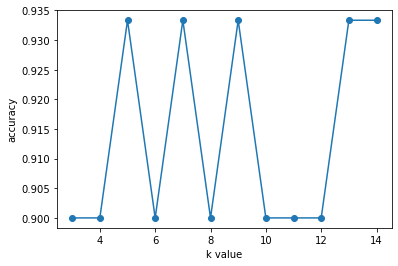

In [44]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [45]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train,y_train)
y_predic=classifier.predict(x_test)

In [46]:
print("Accuracy is:",accuracy_score(y_test,y_predic))
print("Precision is:",precision_score(y_test,y_predic,average='weighted'))
print("Recall is:",recall_score(y_test,y_predic,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predic,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9466666666666667
Recall is: 0.9333333333333333
F1 Score is: 0.9333333333333333


In [47]:
confusion_matrix(y_test,y_predic)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]], dtype=int64)

#  5. Building the model using Decision Tree Model¶

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pr=dt.predict(x_test)

In [50]:
print("Accuracy is:",accuracy_score(y_test,y_pr))
print("Precision is:",precision_score(y_test,y_pr,average='weighted'))
print("Recall is:",recall_score(y_test,y_pr,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pr,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9466666666666667
Recall is: 0.9333333333333333
F1 Score is: 0.9333333333333333


In [51]:
confusion_matrix(y_test,y_pr)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]], dtype=int64)

# 6. Building the model using SVM Model¶

In [52]:
from sklearn.svm import SVC

# 6.1 Linear SVM

In [53]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pre=svm_linear.predict(x_test)

In [54]:
print("Accuracy is:",accuracy_score(y_test,y_pre))
print("Precision is:",precision_score(y_test,y_pre,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [55]:
confusion_matrix(y_test,y_pre)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

# 6.2 Polynomial SVM

In [56]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pre1=svm_poly.predict(x_test)

In [57]:
print("Accuracy is:",accuracy_score(y_test,y_pre1))
print("Precision is:",precision_score(y_test,y_pre1,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre1,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre1,average='weighted'))

Accuracy is: 0.9
Precision is: 0.9037037037037037
Recall is: 0.9
F1 Score is: 0.9003095975232199


In [58]:
confusion_matrix(y_test,y_pre1)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  2,  8]], dtype=int64)

# 6.3 Radial SVM

In [59]:
svm_rad=SVC(kernel='rbf')
svm_rad.fit(x_train,y_train)
y_pre2=svm_rad.predict(x_test)

In [60]:
print("Accuracy is:",accuracy_score(y_test,y_pre2))
print("Precision is:",precision_score(y_test,y_pre2,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre2,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre2,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9466666666666667
Recall is: 0.9333333333333333
F1 Score is: 0.9333333333333333


In [61]:
confusion_matrix(y_test,y_pre2)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]], dtype=int64)

# Insight
    The logistic regression model has the highest vaules.
    Accuracy is: 0.9666666666666667
    Precision is: 0.9703703703703703
    Recall is: 0.9666666666666667
    F1 Score is: 0.9667698658410733